In [372]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

% matplotlib inline
sns.set(style='whitegrid', color_codes=True)
sns.set(font_scale=1)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)



In [373]:
from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf-8"))

anthenaeum_paintings_tidy.csv
athenaeum_authors.csv
athenaeum_authors_preview.csv
athenaeum_paintings.csv
images
images_athenaeum
old
paintings_filtered.csv
resized_200_old



In [442]:
authors = pd.read_csv('data/athenaeum_authors.csv')
paintings = pd.read_csv('data/athenaeum_painting_filtered.csv')

In [443]:
authors.shape

(8377, 9)

In [313]:
authors.describe(include='all')

,art_movement,author_id,bio_url,birth_year,death_year,first_name,last_name,nationality,num_works
count,1391,8376.000000,8376,8376.000000,8349.000000,8301,8376,8337,8376.000000
unique,40,NaN,8376,NaN,NaN,4557,6621,59,NaN
top,Dutch Golden Age,NaN,http://www.the-athenaeum.org/people/detail.php...,NaN,NaN,John,Unknown,American,NaN
freq,227,NaN,1,NaN,NaN,123,43,1388,NaN
mean,NaN,5675.683739,NaN,1785.513610,1850.205773,NaN,NaN,NaN,24.891117
std,NaN,3314.342495,NaN,123.363088,129.300183,NaN,NaN,NaN,71.023749
min,NaN,3.000000,NaN,400.000000,19.000000,NaN,NaN,NaN,1.000000
25%,NaN,2751.750000,NaN,1780.000000,NaN,NaN,NaN,NaN,2.000000
50%,NaN,5799.500000,NaN,1834.000000,NaN,NaN,NaN,NaN,6.000000
75%,NaN,8463.250000,NaN,1858.000000,NaN,NaN,NaN,NaN,19.000000


In [262]:
paintings.describe(include='all')

,medium,painting_location,image_out,height_uom,height,article_type,painting_url,width_uom,painting_dates,painting_title,author_id,painting_id,width
count,175098,206675,0.0,132682,132682.000000,207352,207353,132682,207352,207349,207353.000000,207353.000000,132682.000000
unique,36,3594,NaN,1,NaN,12,207350,1,6839,153180,NaN,NaN,NaN
top,oil on canvas,Private collection,NaN,cm,NaN,Painting,http://www.the-athenaeum.org/art/display_image...,cm,Date unknown,Landscape,NaN,NaN,NaN
freq,123284,74902,NaN,132682,NaN,173570,2,132682,57696,982,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,70.298652,NaN,NaN,NaN,NaN,NaN,3616.637473,131441.079049,73.495612
std,NaN,NaN,NaN,NaN,59.157431,NaN,NaN,NaN,NaN,NaN,3158.509007,79528.109135,77.375487
min,NaN,NaN,NaN,NaN,0.800000,NaN,NaN,NaN,NaN,NaN,3.000000,33.000000,0.940000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,622.000000,57931.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2749.000000,132743.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5753.000000,198532.000000,NaN


In [215]:
paintings.head(3)

,medium,painting_location,image_out,height_uom,height,article_type,painting_url,width_uom,painting_dates,painting_title,author_id,painting_id,width
0,oil on canvas,Private collection,NaN,cm,16.2,Painting,http://www.the-athenaeum.org/art/display_image...,cm,1915,"Zucchini, Tomatoes and Eggplant",24,104839,25.0
1,oil on canvas,Private collection,NaN,NaN,NaN,Painting,http://www.the-athenaeum.org/art/display_image...,NaN,1899-1901,"Waterloo Bridge, Hazy Sun",13,3831,NaN
2,oil on canvas,Art Institute of Chicago (United States - Chi...,NaN,cm,65.0,Painting,http://www.the-athenaeum.org/art/display_image...,cm,1900,"Waterloo Bridge, Grey Weather",13,3268,93.0


In [20]:
authors.head(3)

,art_movement,author_id,bio_url,birth_year,death_year,first_name,last_name,nationality,num_works
0,Impressionist,24,http://www.the-athenaeum.org/people/detail.php...,1841,1919.0,Pierre Auguste,Renoir,French,1714
1,Symbolist,1793,http://www.the-athenaeum.org/people/detail.php...,1863,1944.0,Edvard,Munch,Norwegian,1673
2,Impressionist,368,http://www.the-athenaeum.org/people/detail.php...,1856,1925.0,John Singer,Sargent,American,1669


In [378]:
authors.groupby('art_movement').agg({'num_works': sum, 'author_id': 'count'})\
    .rename(columns = {'author_id': 'num_authors'})\
    .sort_values('num_works',ascending = False).head(10)

,num_works,num_authors
art_movement,,
Impressionist,15232,69
Post-Impressionist,8649,28
Dutch Golden Age,7683,227
Renaissance,6550,181
Academist,6090,139
Romantic,5519,82
Expressionist,4963,28
Rococo,4772,83
Baroque,4581,129


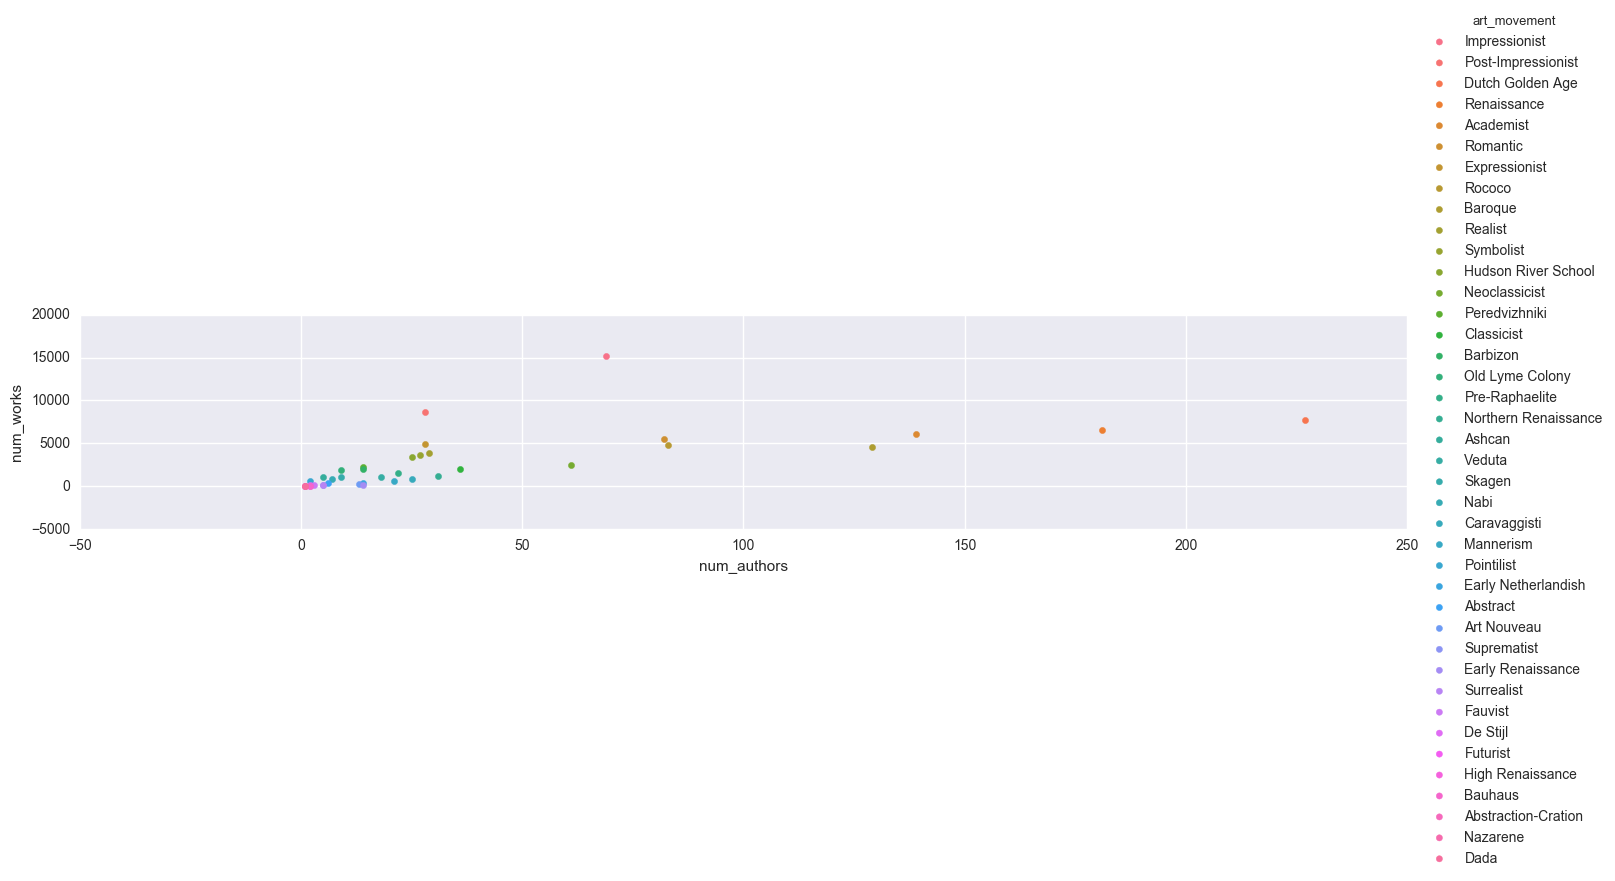

In [418]:
movements = authors.groupby('art_movement').agg({'num_works': sum, 'author_id': 'count'})\
    .rename(columns = {'author_id': 'num_authors'})\
    .sort_values('num_works', ascending = False).reset_index()
#movements['art_movement'] = pd.Categorical(movements['art_movement'])
movements['art_movement'] = movements['art_movement'].apply(lambda x: x.decode('ascii', 'ignore'))
#art_movements = movements['art_movement']
fg = sns.FacetGrid(data=movements, hue='art_movement', aspect=4.81)
fg.map(plt.scatter, 'num_authors', 'num_works').add_legend()

In [411]:
authors['art_movement'].value_counts()

Dutch Golden Age        227
Renaissance             181
Academist               139
Baroque                 129
Rococo                   83
Romantic                 82
Impressionist            69
Neoclassicist            61
Classicist               36
Northern Renaissance     31
Realist                  29
Expressionist            28
Post-Impressionist       28
Symbolist                27
Caravaggisti             25
Hudson River School      25
Pre-Raphaelite           22
Mannerism                21
Veduta                   18
Early Renaissance        14
Peredvizhniki            14
Barbizon                 14
Early Netherlandish      14
Art Nouveau              13
Skagen                    9
Old Lyme Colony           9
Nabi                      7
Abstract                  6
Ashcan                    5
Suprematist               5
Surrealist                5
Fauvist                   3
Bauhaus                   2
Pointilist                2
High Renaissance          2
De Stijl            

In [334]:
authors['num_works'].sum()

208488

In [333]:
authors.loc[authors['art_movement'].isnull(), 'num_works'].sum() / float(authors['num_works'].sum())

0.5381700625455662

In [367]:
sum(authors['num_works'] == 1)

1270

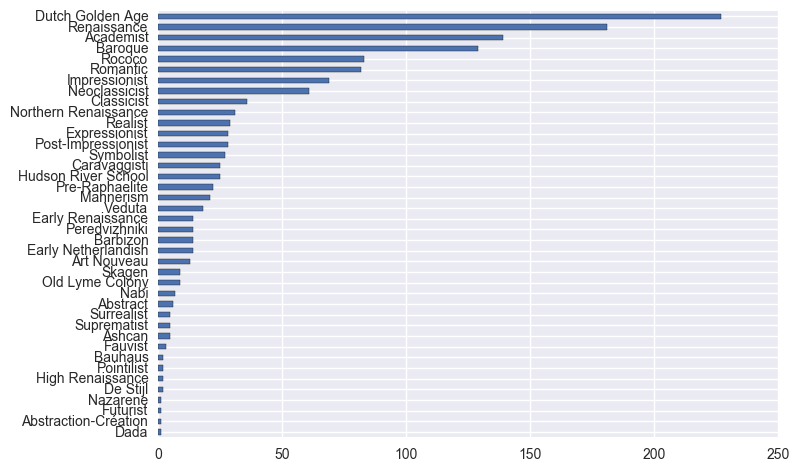

In [321]:
authors['art_movement'].value_counts().sort_values().plot.barh()

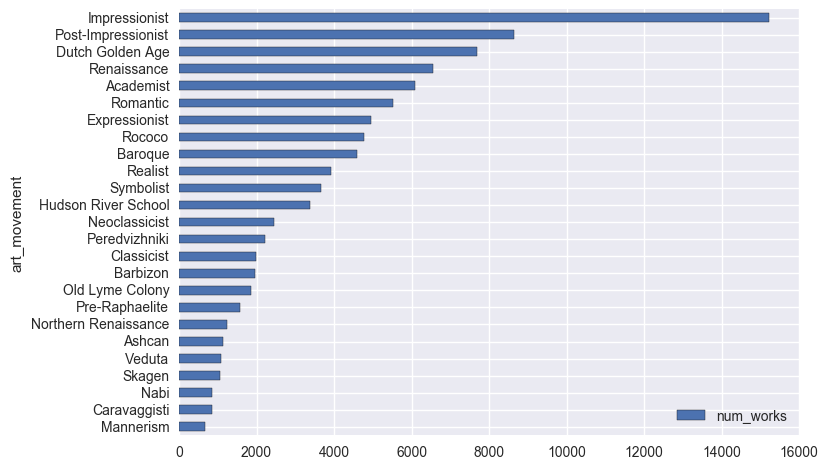

In [329]:
authors.groupby('art_movement').agg({'num_works': 'sum'})\
    .sort_values('num_works', ascending = True).iloc[-25:].plot.barh()

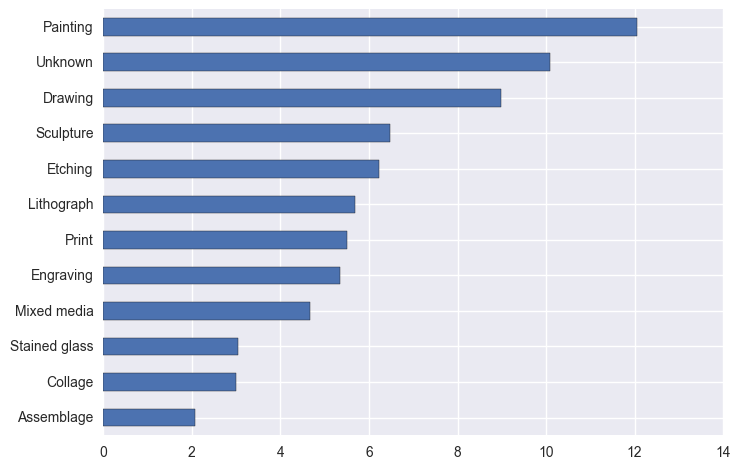

In [216]:
np.log(paintings['article_type'].value_counts()[::-1]).plot.barh()

In [217]:
paintings['article_type'].value_counts()

Painting         173570
Unknown           23846
Drawing            7871
Sculpture           654
Etching             502
Lithograph          296
Print               245
Engraving           212
Mixed media         107
Stained glass        21
Collage              20
Assemblage            8
Name: article_type, dtype: int64

In [441]:
len(paintings['author_id'].value_counts())

7089

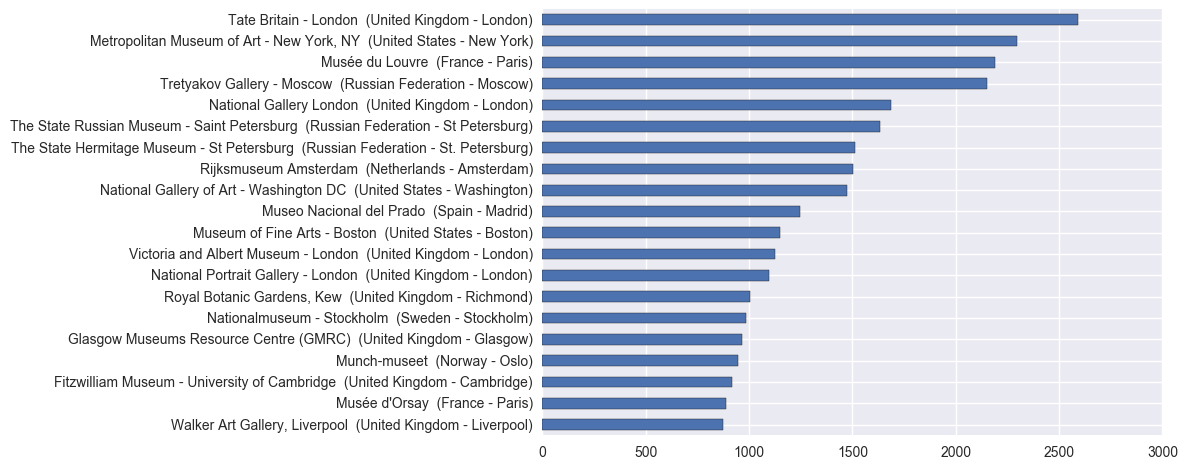

In [220]:
paintings['painting_location'].value_counts()[21:1:-1].plot.barh()

In [221]:
pd.DataFrame(paintings.painting_dates.value_counts())

,painting_dates
Date unknown,57696
1890,1471
1889,1465
1888,1385
1913,1357
1885,1275
1912,1271
1910,1255
1908,1229
1892,1216


In [228]:
def convert_date(x):
    # removes the 'circa' parts, converts 'date unknown' to None
    x = re.match(r'(?:circa )?(\d+-?\d*)?', str(x)).group(1)
    if x is None:
        return None
    x = map(int, x.split('-'))
    return sum(x) / len(x)

pattern1 = paintings.painting_dates.apply(convert_date)
group_date = pattern1.apply(lambda x: '%d-%d' % (int(x) / 50 * 50, int(x) / 50 * 50+ 49) if not np.isnan(x) else None)

In [225]:
paintings[pattern1 > 2016]

,medium,painting_location,image_out,height_uom,height,article_type,painting_url,width_uom,painting_dates,painting_title,author_id,painting_id,width
10298,oil on canvas,Private collection,NaN,cm,30.20,Painting,http://www.the-athenaeum.org/art/display_image...,cm,circa 18809-1880,Portrait of a Little Boy,24,112442,23.20
21656,oil on canvas,McLean Museum and Art Gallery (United Kingdom...,NaN,cm,152.00,Painting,http://www.the-athenaeum.org/art/display_image...,cm,1903-9013,Spring,2394,198714,122.50
68304,oil on canvas,Abbot Hall Art Gallery (Lakeland Arts Trust) ...,NaN,cm,64.30,Painting,http://www.the-athenaeum.org/art/display_image...,cm,1900-9900,Marita,10878,254722,47.00
76188,oil on canvas,"Government House, Jersey (Jersey)",NaN,cm,49.00,Painting,http://www.the-athenaeum.org/art/display_image...,cm,1898-18989,A Jersey Cider Press,8576,187825,60.00
84546,oil on panel,Private collection,NaN,NaN,NaN,Painting,http://www.the-athenaeum.org/art/display_image...,NaN,16688-1668,Madonna and Child adored by St Lawrence and St...,11201,269462,NaN
106994,oil on canvas,Laguna Art Museum (United States - Laguna Bea...,NaN,cm,60.96,Painting,http://www.the-athenaeum.org/art/display_image...,cm,1918-19181,Cloud Shadows,3823,143083,76.20
126013,oil on canvas,Private collection,NaN,cm,54.00,Painting,http://www.the-athenaeum.org/art/display_image...,cm,19918-1918,The Blue House,211,227258,65.00
149223,oil on canvas,Corcoran Gallery of Art (United States - Wash...,NaN,cm,138.43,Painting,http://www.the-athenaeum.org/art/display_image...,cm,1910-11910,Penelope,1731,128136,129.22
168721,oil on panel,Private collection,NaN,cm,58.42,Painting,http://www.the-athenaeum.org/art/display_image...,cm,19129-1929,"Red Glare, American Night",3396,143877,76.20
180156,oil on canvas,Private collection,NaN,cm,76.20,Painting,http://www.the-athenaeum.org/art/display_image...,cm,1826-2828,Nicholas Biddle,585,18752,63.50


In [72]:
# pattern1 = pd.DataFrame(map(lambda x: re.match(r'(?:circa )?(\d+-?\d*)?', x).group(1), paintings.painting_dates))
# map(lambda x: map(int, x), pattern1)

In [370]:
paintings[paintings['painting_url'].duplicated(keep=False)]

,medium,painting_location,image_out,height_uom,height,article_type,painting_url,width_uom,painting_dates,painting_title,author_id,painting_id,width
44867,oil on canvas,National Maritime Museum - London (United Kin...,NaN,cm,127.0,Painting,http://www.the-athenaeum.org/art/display_image...,cm,circa 1712,Vice-Admiral Sir John Leake,2948,114402,101.6
73713,oil on canvas,"Château de Versailles (France - Versailles, G...",NaN,NaN,NaN,Painting,http://www.the-athenaeum.org/art/display_image...,NaN,1844,Concert in the Gallerie des Guise at Chateau d’Eu,445,87448,NaN
80870,Unknown,Musée des Beaux-Arts de Brest (France - Brest),NaN,NaN,NaN,Unknown,http://www.the-athenaeum.org/art/display_image...,NaN,Date unknown,Fish Shop,6783,134110,NaN
162503,oil on canvas,Thorvaldsens Museum - Copenhagen (Denmark - C...,NaN,NaN,NaN,Painting,http://www.the-athenaeum.org/art/display_image...,NaN,1830,Entrance to the Port of Copenhagen with the Ma...,748,91788,NaN
169758,bronze,Musée Rodin - Paris (France - Paris),NaN,cm,33.0,Sculpture,http://www.the-athenaeum.org/art/display_image...,cm,1881-1882,Alphonse Legros,220,137162,21.0
203144,Unknown,Unknown,NaN,NaN,NaN,Unknown,http://www.the-athenaeum.org/art/display_image...,NaN,Date unknown,The Colonade in Versailles,363,54840,NaN


In [258]:
# median VS. article_type 
print paintings['medium'].isnull().sum()
paintings['medium'].value_counts()

32255


oil on canvas        123284
oil on panel          17463
watercolor            10249
oil on board           6401
pastel                 3149
oil on cardboard       2860
tempera on panel       1996
oil on paper           1656
chalk                  1323
gouache                1091
oil on copper          1014
fresco                  985
pen and ink             865
pencil                  616
tempera on canvas       477
charcoal                473
graphite                259
marble                  246
bronze                  200
woodcut                 170
other                    81
clay                     69
conte crayon             38
grisaille                31
silverpoint              24
stone                    18
ceramic                  15
monotype                 12
wax                       8
wood                      7
linocut                   6
mixed media               4
steel                     4
gold                      2
monoprint                 1
collograph          

In [270]:
paintings.loc[paintings['article_type'] == 'Unknown', 'medium'].value_counts()

Unknown    23846
Name: medium, dtype: int64

In [444]:
paintings_sized = pd.read_csv('./data/athenaeum_paintings_sizes.csv')
paintings_sized.head(3)

,medium,painting_location,height,article_type,painting_url,painting_dates,painting_title,author_id,painting_id,width,height_px,width_px
0,oil on canvas,Private collection,16.2,Painting,http://www.the-athenaeum.org/art/display_image...,1915,"Zucchini, Tomatoes and Eggplant",24,104839,25.0,842.0,1280.0
1,oil on canvas,Private collection,NaN,Painting,http://www.the-athenaeum.org/art/display_image...,1899-1901,"Waterloo Bridge, Hazy Sun",13,3831,NaN,710.0,1103.0
2,oil on canvas,Art Institute of Chicago (United States - Chi...,65.0,Painting,http://www.the-athenaeum.org/art/display_image...,1900,"Waterloo Bridge, Grey Weather",13,3268,93.0,571.0,800.0


In [447]:
len(paintings_sized['author_id'].value_counts())

7108

In [425]:
filter_out = ['Collage', 'Stained glass', 'Sculpture']
paintings_filtered = paintings_sized[np.logical_not(paintings_sized['article_type'].isin(filter_out))]
sum(paintings_filtered['article_type'] == 'Collage')

0

In [423]:
paintings_filtered.columns

Index([u'medium', u'painting_location', u'height', u'article_type',
       u'painting_url', u'painting_dates', u'painting_title', u'author_id',
       u'painting_id', u'width', u'height_px', u'width_px'],
      dtype='object')

In [ ]:
filter_out_columns = ['image_out', 'height_uom', 'width_uom']
paintings_filtered = paintings_filtered.drop(filter_out_columns, axis=1)
paintings_filtered.head(2)

In [426]:
paintings_filtered.to_csv('./data/paintings_filtered.csv', index=False)
paintings_filtered.shape

(206550, 12)

In [427]:
paintings_filtered.groupby(['article_type', 'medium']).agg({'painting_id': 'count'})\
    .rename(columns = {'painting_id': 'num_paintings'})#\
#     .unstack()

num_paintings
article_type medium                          
Drawing      chalk                       1323
             charcoal                     473
             conte crayon                  38
             graphite                     259
             pastel                      3149
             pen and ink                  865
             pencil                       616
             silverpoint                   24
Painting     fresco                       985
             gouache                     1091
             grisaille                     31
             oil on board                6398
             oil on canvas             123184
             oil on cardboard            2860
             oil on copper               1014
             oil on panel               17458
             oil on paper                1656
             tempera on canvas            477
             tempera on panel            1996
             watercolor                 10249
Print        collograph                     1
             linocut                        6
             monoprint                      1
             monotype                      12
             woodcut                      170

In [267]:
paintings['medium'] = paintings['medium'].fillna('Unknown')
paintings['medium'].value_counts()

oil on canvas        123284
Unknown               32255
oil on panel          17463
watercolor            10249
oil on board           6401
pastel                 3149
oil on cardboard       2860
tempera on panel       1996
oil on paper           1656
chalk                  1323
gouache                1091
oil on copper          1014
fresco                  985
pen and ink             865
pencil                  616
tempera on canvas       477
charcoal                473
graphite                259
marble                  246
bronze                  200
woodcut                 170
other                    81
clay                     69
conte crayon             38
grisaille                31
silverpoint              24
stone                    18
ceramic                  15
monotype                 12
wax                       8
wood                      7
linocut                   6
mixed media               4
steel                     4
gold                      2
monoprint           

In [226]:
paintings.loc[pattern1.isnull(), 'painting_dates'].value_counts()

Date unknown    57696
Name: painting_dates, dtype: int64

In [254]:
no_none_pattern = filter(None, pattern1.values)
# no_none_pattern

In [169]:
pattern2 = pd.concat([ length_pattern_df.reset_index(drop=True), no_none_pattern_df], axis = 1, ignore_index=False)
date_eda = [(lambda x: sum(x) / len(x))(map(int, d.split('-'))) for d in pattern2.year if len(d) > 4]

In [180]:
group_date = map(lambda x: '%4d-%4d' % (x / 50 * 50, x / 50 * 50+ 49), date_eda)

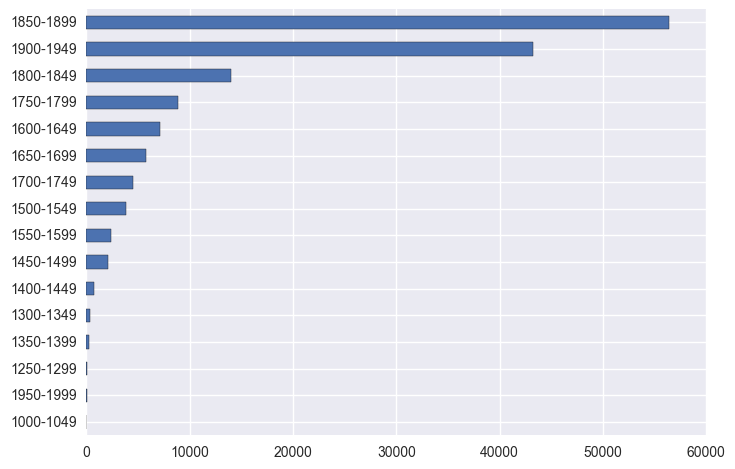

In [236]:
group_date.value_counts()[15::-1].plot.barh()

In [206]:
[(x, group_date.count(x)) for x in set(group_date)]

KeyError: 'Level 1200-1249 must be same as name (None)'

In [171]:
max(date_eda)

10344

In [17]:
map(int, paintings.painting_dates)

ValueError: invalid literal for int() with base 10: '1899-1901'

In [10]:
paintings.painting_dates[0]

'1915'

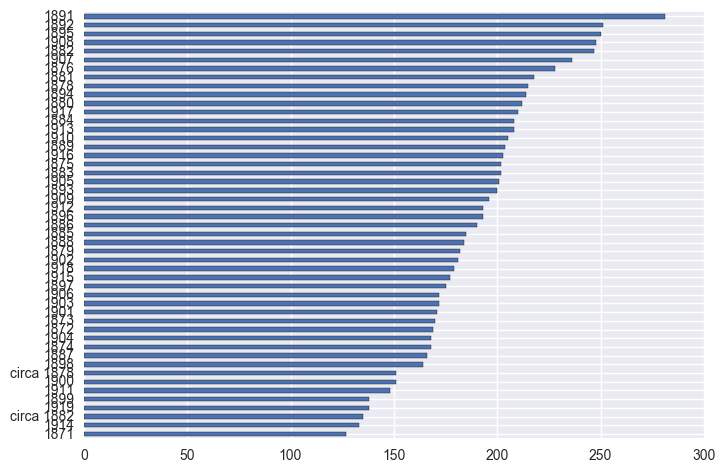

In [8]:
paintings.painting_dates.value_counts()[50:1:-1].plot.barh()

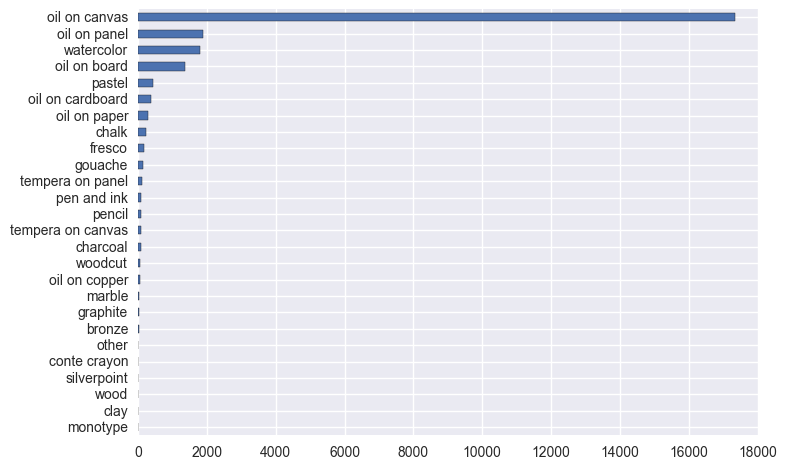

In [15]:
paintings['medium'].value_counts()[::-1].plot.barh()

In [60]:
paintings.loc[paintings['article_type'] == 'Engraving', 'painting_url'].values

array(['http://www.the-athenaeum.org/art/display_image.php?id=462111',
       'http://www.the-athenaeum.org/art/display_image.php?id=462117',
       'http://www.the-athenaeum.org/art/display_image.php?id=822257',
       'http://www.the-athenaeum.org/art/display_image.php?id=534091',
       'http://www.the-athenaeum.org/art/display_image.php?id=534082',
       'http://www.the-athenaeum.org/art/display_image.php?id=534085',
       'http://www.the-athenaeum.org/art/display_image.php?id=534070',
       'http://www.the-athenaeum.org/art/display_image.php?id=534064',
       'http://www.the-athenaeum.org/art/display_image.php?id=534058'], dtype=object)

In [61]:
paintings.loc[paintings['article_type'] == 'Mixed media', 'painting_url'].values

array(['http://www.the-athenaeum.org/art/display_image.php?id=464214',
       'http://www.the-athenaeum.org/art/display_image.php?id=786987',
       'http://www.the-athenaeum.org/art/display_image.php?id=322511',
       'http://www.the-athenaeum.org/art/display_image.php?id=718805',
       'http://www.the-athenaeum.org/art/display_image.php?id=393367',
       'http://www.the-athenaeum.org/art/display_image.php?id=391624',
       'http://www.the-athenaeum.org/art/display_image.php?id=391378',
       'http://www.the-athenaeum.org/art/display_image.php?id=392730',
       'http://www.the-athenaeum.org/art/display_image.php?id=714498',
       'http://www.the-athenaeum.org/art/display_image.php?id=693959'], dtype=object)

In [63]:
paintings.loc[paintings['article_type'] == 'Etching', 'painting_url'].sample(10).values

array(['http://www.the-athenaeum.org/art/display_image.php?id=576576',
       'http://www.the-athenaeum.org/art/display_image.php?id=474135',
       'http://www.the-athenaeum.org/art/display_image.php?id=501554',
       'http://www.the-athenaeum.org/art/display_image.php?id=483586',
       'http://www.the-athenaeum.org/art/display_image.php?id=462096',
       'http://www.the-athenaeum.org/art/display_image.php?id=269664',
       'http://www.the-athenaeum.org/art/display_image.php?id=483244',
       'http://www.the-athenaeum.org/art/display_image.php?id=481111',
       'http://www.the-athenaeum.org/art/display_image.php?id=255249',
       'http://www.the-athenaeum.org/art/display_image.php?id=325586'], dtype=object)

In [64]:
paintings.loc[paintings['article_type'] == 'Lithograph', 'painting_url'].sample(10).values

array(['http://www.the-athenaeum.org/art/display_image.php?id=221476',
       'http://www.the-athenaeum.org/art/display_image.php?id=629081',
       'http://www.the-athenaeum.org/art/display_image.php?id=179800',
       'http://www.the-athenaeum.org/art/display_image.php?id=221440',
       'http://www.the-athenaeum.org/art/display_image.php?id=783943',
       'http://www.the-athenaeum.org/art/display_image.php?id=483406',
       'http://www.the-athenaeum.org/art/display_image.php?id=629078',
       'http://www.the-athenaeum.org/art/display_image.php?id=180118',
       'http://www.the-athenaeum.org/art/display_image.php?id=495876',
       'http://www.the-athenaeum.org/art/display_image.php?id=698645'], dtype=object)

In [65]:
paintings.loc[paintings['article_type'] == 'Print', 'painting_url'].sample(10).values

array(['http://www.the-athenaeum.org/art/display_image.php?id=548508',
       'http://www.the-athenaeum.org/art/display_image.php?id=549189',
       'http://www.the-athenaeum.org/art/display_image.php?id=716425',
       'http://www.the-athenaeum.org/art/display_image.php?id=549183',
       'http://www.the-athenaeum.org/art/display_image.php?id=543902',
       'http://www.the-athenaeum.org/art/display_image.php?id=546469',
       'http://www.the-athenaeum.org/art/display_image.php?id=727007',
       'http://www.the-athenaeum.org/art/display_image.php?id=549207',
       'http://www.the-athenaeum.org/art/display_image.php?id=427558',
       'http://www.the-athenaeum.org/art/display_image.php?id=355223'], dtype=object)

In [67]:
# Drawing -- keep

paintings.loc[paintings['article_type'] == 'Drawing', 'painting_url'].sample(10).values

array(['http://www.the-athenaeum.org/art/display_image.php?id=451694',
       'http://www.the-athenaeum.org/art/display_image.php?id=548538',
       'http://www.the-athenaeum.org/art/display_image.php?id=196714',
       'http://www.the-athenaeum.org/art/display_image.php?id=761801',
       'http://www.the-athenaeum.org/art/display_image.php?id=463329',
       'http://www.the-athenaeum.org/art/display_image.php?id=278694',
       'http://www.the-athenaeum.org/art/display_image.php?id=84143',
       'http://www.the-athenaeum.org/art/display_image.php?id=164428',
       'http://www.the-athenaeum.org/art/display_image.php?id=161863',
       'http://www.the-athenaeum.org/art/display_image.php?id=707160'], dtype=object)

In [69]:
# Unknown -- keep

paintings.loc[paintings['article_type'] == 'Unknown', 'painting_url'].sample(10).values

array(['http://www.the-athenaeum.org/art/display_image.php?id=794112',
       'http://www.the-athenaeum.org/art/display_image.php?id=590471',
       'http://www.the-athenaeum.org/art/display_image.php?id=329660',
       'http://www.the-athenaeum.org/art/display_image.php?id=704929',
       'http://www.the-athenaeum.org/art/display_image.php?id=319643',
       'http://www.the-athenaeum.org/art/display_image.php?id=511557',
       'http://www.the-athenaeum.org/art/display_image.php?id=235623',
       'http://www.the-athenaeum.org/art/display_image.php?id=495333',
       'http://www.the-athenaeum.org/art/display_image.php?id=793378',
       'http://www.the-athenaeum.org/art/display_image.php?id=257277'], dtype=object)

In [ ]:
# sculpt -- useless
paintings.loc[paintings['article_type'] == 'Sculpture', 'painting_url'].sample(10).values

In [ ]:
# collage check -- useless
paintings[paintings['article_type'] == 'Collage']['painting_url'].values

In [ ]:
# Stained glass -- useless
paintings.loc[paintings['article_type'] == 'Stained glass', 'painting_url'].values

In [77]:
drop_type = ['Sculpture', 'Collage', 'Stained glass']
sum(paintings['article_type'].isin(drop_type))

84

In [78]:
paintings = paintings[np.logical_not(paintings['article_type'].isin(drop_type))]

In [79]:
paintings = paintings.drop('image_out', axis = 1)

In [80]:
paintings.to_csv('./data/anthenaeum_paintings_tidy.csv', index=False)

In [238]:
paintings[paintings['painting_id'].duplicated(keep=False)]

,medium,painting_location,image_out,height_uom,height,article_type,painting_url,width_uom,painting_dates,painting_title,author_id,painting_id,width
170559,NaN,Rijksmuseum Amsterdam (Netherlands - Amsterdam),NaN,NaN,NaN,Unknown,http://www.the-athenaeum.org/art/display_image...,NaN,1889,Meisje aan de piano,2336,51281,NaN
207346,watercolor,British Museum (United Kingdom - London),NaN,cm,50.1,Painting,http://www.the-athenaeum.org/art/display_image...,cm,1781,Villa of Maecenas at Tivoli,2962,51281,38.3


In [239]:
authors[authors['author_id'] == 2336]

,art_movement,author_id,bio_url,birth_year,death_year,first_name,last_name,nationality,num_works
364,NaN,2336,http://www.the-athenaeum.org/people/detail.php...,1837,1899.0,Jacob Hendricus,Maris,Dutch,119


In [241]:
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

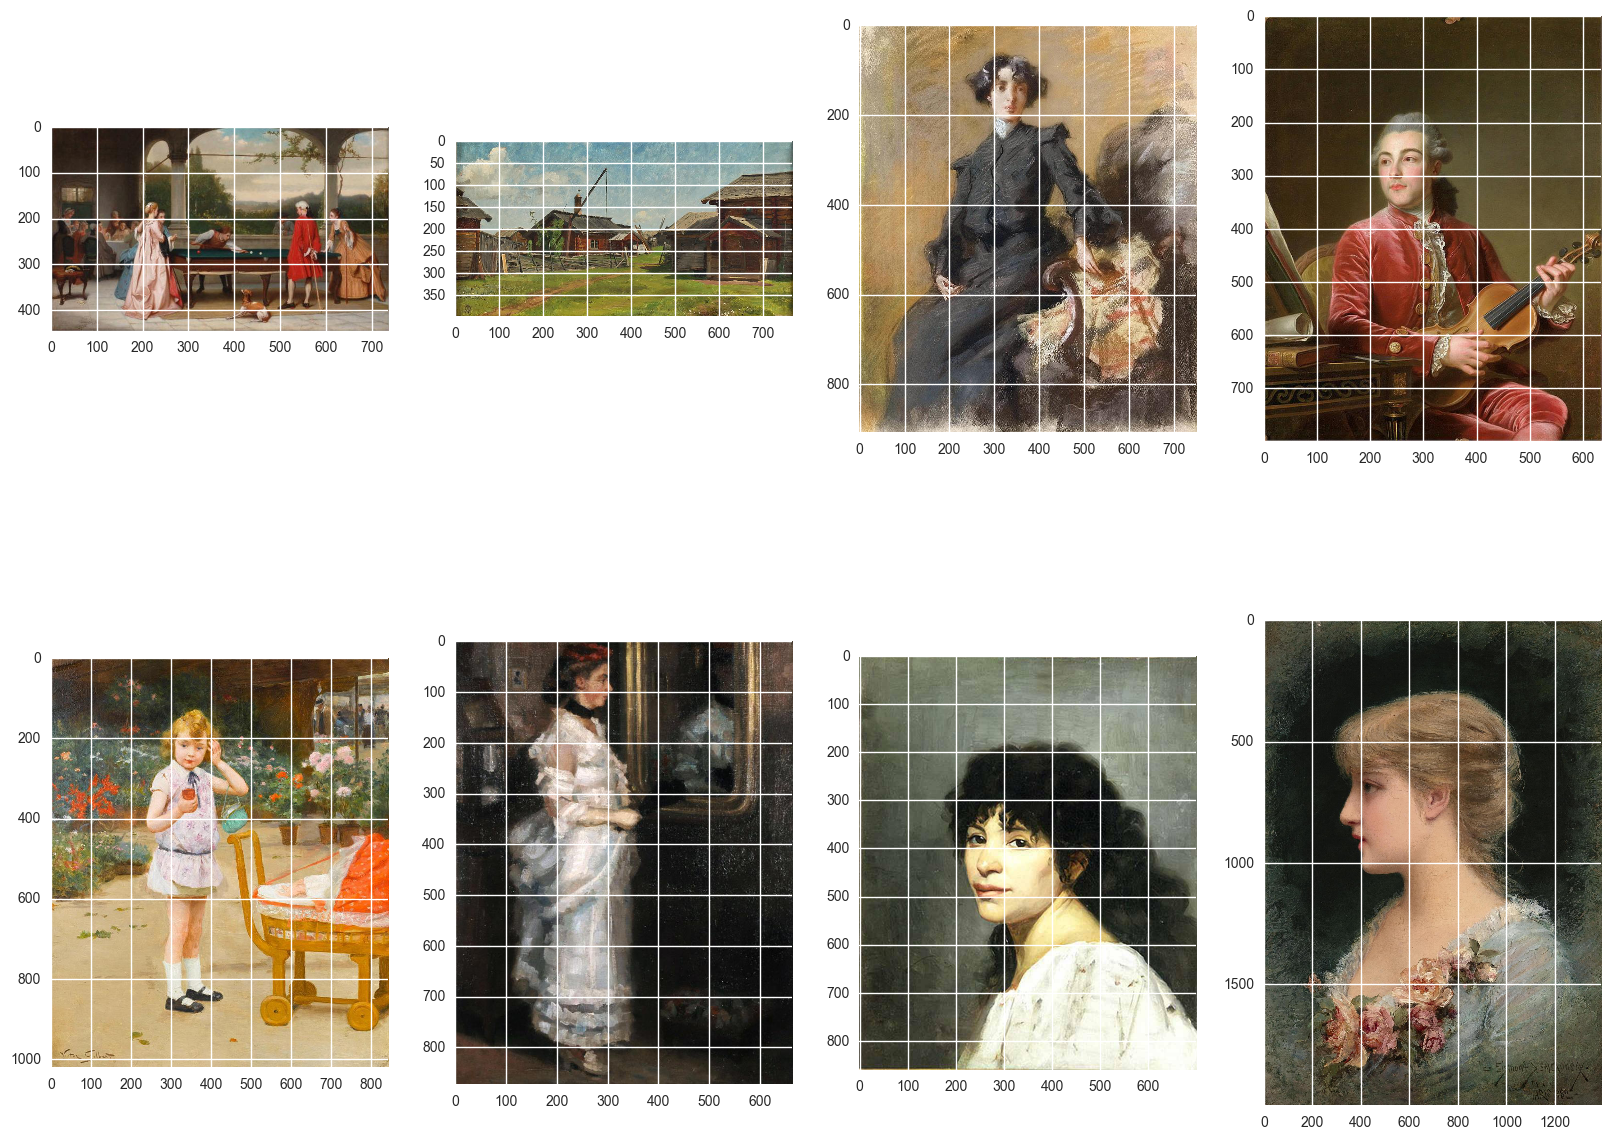

In [301]:
sample_painting = paintings[paintings['article_type'] == 'Unknown'].sample(8)
f, ax = plt.subplots(2, 4, figsize = (20,15))
for i in range(8):
    im = Image.open('data/images_athenaeum/full/%d/%d.jpg' % (sample_painting.iloc[i]['author_id'],
                                                              sample_painting.iloc[i]['painting_id']))
    ax[i / 4, i % 4].imshow(im)

In [ ]:
def get_sizes():
    painting_sizes = []
    num_processed = 0
    total = len(paintings)
    for key, row in paintings.iterrows():
        num_processed += 1
        try:
            image_path = os.path.join('data/images_athenaeum/full',str(row['author_id']) , str(row['painting_id']) + '.jpg')
            if os.path.exists(image_path):
                im = Image.open(image_path)
                painting_sizes.append([im.height, im.width])
            else:
                painting_sizes.append([None, None])
            sys.stdout.write('\r\x1b[2K%d/%d' % (num_processed, total))
            sys.stdout.flush()
        except BaseException as e:
            painting_sizes.append([None, None])
            sys.stderr.write(str(e) + '\n')
            sys.stderr.flush()

    print ''
    painting_sizes_df = pd.concat((paintings[['author_id', 'painting_id']].reset_index(drop = True),
                                   pd.DataFrame(painting_sizes, columns = ['height_px', 'width_px'])), axis = 1)

In [ ]:
paintings_reduced = paintings.drop(['height_uom', 'width_uom', 'image_out'], axis = 1)\
    .merge(painting_sizes_df, how = 'inner', on = ['author_id', 'painting_id'])\
    .dropna(subset = ['height_px', 'width_px'])
paintings_reduced[['height_px', 'width_px']] = paintings_reduced[['height_px', 'width_px']].applymap(int)

In [375]:
from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf-8"))

anthenaeum_paintings_tidy.csv
athenaeum_authors.csv
athenaeum_authors_preview.csv
athenaeum_paintings.csv
images
images_athenaeum
old
paintings_filtered.csv
resized_200_old



In [430]:
paintings_filtered[['height_px', 'width_px']].describe(include='all')

,height_px,width_px
count,206550.000000,206550.000000
mean,899.851213,935.436369
std,324.913999,335.101525
min,79.000000,103.000000
25%,685.000000,728.000000
50%,848.000000,899.000000
75%,1024.000000,1098.000000
max,4000.000000,3825.000000
